**Download Dataset**

In [23]:
!gdown https://drive.google.com/uc?id=1OTS726FHnYMqPg6gaz2Ga-WvvhnLv6v1

Downloading...
From: https://drive.google.com/uc?id=1OTS726FHnYMqPg6gaz2Ga-WvvhnLv6v1
To: /content/ddos_01_12_prep_training.csv
15.5MB [00:00, 30.0MB/s]


**Import Packages**

In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

**Import Dataset**

In [25]:
df = pd.read_csv("./ddos_01_12_prep_training.csv")
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,label
0,52380,443,6,1,2,0,0,0,0,0,0.000000,0.000000,0,0,0.0,0.0,1.000,0.000000e+00,1,1,1,1.000,0.000,1,1,0,0.0,0.0,0,0,0,0,0,0,40.0,0,2.000000e+06,0.000000,0,0,0.00,0.0,0.00,0,0,0,0,0,1,1,0,0,0.00,0.000000,0.0,40.0,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0,BENIGN
1,443,52380,6,2,3,0,62,0,31,0,20.666667,17.897858,0,0,0.0,0.0,1.000,0.000000e+00,1,1,2,1.000,0.000,1,1,0,0.0,0.0,0,0,1,0,0,0,60.0,0,1.500000e+06,0.000000,0,31,23.25,15.5,240.25,0,0,1,0,0,1,0,0,0,31.00,20.666667,0.0,60.0,0,0,0,0,0,0,3,62,0,0,245,-1,1,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1,BENIGN
2,443,52380,6,218,1,2,0,0,0,0,0.000000,0.000000,0,0,0.0,0.0,109.000,8.626703e+01,170,48,0,0.000,0.000,0,0,48,48.0,0.0,48,48,0,0,0,0,20.0,40,4.587156e+03,9174.311927,0,0,0.00,0.0,0.00,0,0,0,0,0,1,1,0,2,0.00,0.000000,0.0,20.0,0,0,0,0,0,0,1,0,2,0,245,0,0,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1,BENIGN
3,0,0,0,115366430,52,0,0,0,0,0,0.000000,0.000000,0,0,0.0,0.0,2262086.863,4.120832e+06,9988327,1,115366430,2262086.863,4120831.638,9988327,1,0,0.0,0.0,0,0,0,0,0,0,0.0,0,4.507377e-01,0.000000,0,0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.0,0.0,0,0,0,0,0,0,52,0,0,0,-1,-1,0,0,6.666667e+00,1.073087e+00,8,4,9.613862e+06,2.884856e+05,9988327,9110910,0,BENIGN
4,68,67,17,109157387,16,0,4800,0,300,300,300.000000,0.000000,0,0,0.0,0.0,7277159.133,4.248209e+06,14600796,2166672,109157387,7277159.133,4248209.222,14600796,2166672,0,0.0,0.0,0,0,0,0,0,0,404.0,0,1.465773e-01,0.000000,300,300,300.00,0.0,0.00,0,0,0,0,0,0,0,0,0,318.75,300.000000,0.0,404.0,0,0,0,0,0,0,16,4800,0,0,-1,-1,15,20,5.929966e+06,3.774939e+06,10054849,2647210,1.015194e+07,2.795046e+06,14600796,6304546,0,BENIGN


**Encoding Label**

In [26]:
df = df.sample(n = 52318, replace = False, random_state= 32)
df['label'] = df['label'].map({'BENIGN' : 0, 'DDOS' : 1})
df.label.value_counts()

1    26892
0    25426
Name: label, dtype: int64

**Split Input & Output Feature**

In [27]:
X = df.drop(columns="label")
y = df['label']
X.shape

(52318, 79)

**Standard Scaler**

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
scalar = StandardScaler(copy=False, with_mean=False, with_std=False)
scalar.fit(X)
X = scalar.transform(X)

**Feature Selection Function**

In [29]:
# def feature_selection_IG(n_feature, df) :
#   list_select_attribute = []
#   list_feature = [2,1,40,54,11,53,41,10,39,9,7,64,19,79,17,38,4,37,18,36,65,6,35,56,29,26,27,43,42,30,67,52,70,13,8,66,15,55,24,21,22,68,14,49,63,5,12,69,23,25,20,3,28,50,16,74,73,71,31,46,75,77,78,76,72,45,48,60,59,61,57,58,62,51,33,34,44,47,32]
  
#   for x in list_feature:
#     list_select_attribute.append(x-1)

#   feature_selection = list_select_attribute[0:n_feature]
#   feature_selection
#   df= df.iloc[: ,feature_selection]
#   return df
# X = feature_selection_IG(40,X)
# X


**Feature Extraction PCA**

In [30]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# pca  = PCA(n_components = 40, whiten = True)
# X = pca.fit_transform(X)
# X.shape

**Custom Dataset RNN**

In [31]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence)):
  # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
       break
    # gather input and output parts of the pattern
    seq_x = sequence[i:end_ix]
    X.append(seq_x)
  return array(X)

# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 50
# transform input from [samples, features] to [samples, timesteps, features]
#X_ = X_.reshape((X_.shape[0], X_.shape[1], 79))
# split into samples
X_= split_sequence(raw_seq, n_steps)
Y = y[n_steps-1:len(df)-1]

**Split Dataset**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y ,test_size = 0.3,shuffle=False)

**Import Packages Tensorflow Keras**

In [33]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TimeDistributed
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
import seaborn as sns; sns.set()
from keras.callbacks import EarlyStopping

**Early Stopping**

In [34]:
early_stopping_monitor = EarlyStopping(patience=30)

**Training Model**

In [35]:
def create_baseline():
    model = Sequential()
    model.add(SimpleRNN(128))
    model.add(Dense(32))
    model.add(Dropout(0.1))
    model.add(Dense(16)) 
    model.add(Dropout(0.1))
    model.add(Dense(8))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [36]:
model = create_baseline()

In [37]:
import time
start_time = time.time()
history = model.fit(X_train, Y_train, epochs = 50, callbacks = [early_stopping_monitor], batch_size =100, validation_split=0.2, verbose = 1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
293/293 [==============================] - 13s 39ms/step - loss: 0.3073 - accuracy: 0.8816 - val_loss: 0.2324 - val_accuracy: 0.9124
Epoch 2/50
293/293 [==============================] - 11s 38ms/step - loss: 0.2536 - accuracy: 0.9073 - val_loss: 0.2275 - val_accuracy: 0.9165
Epoch 3/50
293/293 [==============================] - 11s 39ms/step - loss: 0.2342 - accuracy: 0.9175 - val_loss: 0.2125 - val_accuracy: 0.9212
Epoch 4/50
293/293 [==============================] - 13s 46ms/step - loss: 0.2327 - accuracy: 0.9220 - val_loss: 0.2192 - val_accuracy: 0.9266
Epoch 5/50
293/293 [==============================] - 12s 39ms/step - loss: 0.2304 - accuracy: 0.9210 - val_loss: 0.2238 - val_accuracy: 0.9274
Epoch 6/50
293/293 [==============================] - 11s 39ms/step - loss: 0.2250 - accuracy: 0.9226 - val_loss: 0.2182 - val_accuracy: 0.9261
Epoch 7/50
293/293 [==============================] - 11s 39ms/step - loss: 0.2232 - accuracy: 0.9227 - val_loss: 0.2150 - val_accuracy:

**Save Model**

In [38]:
model.save('RNN')

INFO:tensorflow:Assets written to: RNN/assets


**Load Model**

In [39]:
from tensorflow import keras
model = keras.models.load_model('RNN')

**Predict Model**

491/491 [==============================] - 4s 7ms/step


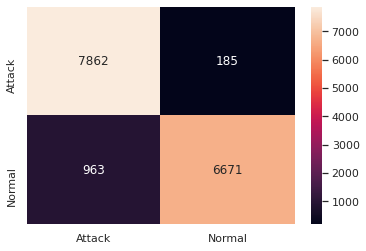

In [40]:
predict = model.predict(X_test, verbose=1)
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

to_heat_map =[[tp,fp],[fn,tn]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [41]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.68%


**Testing Model**

In [ ]:
!gdown https://drive.google.com/uc?id=1Db7O9WB99VfS0_LFR2Gm9WSzuGhQasNH

In [ ]:
!unzip './DATASET_TESTING.zip'

**Import Testing Dataset**

In [ ]:
import pandas as pd
df2 = pd.read_csv("./DATASET_TESTING/LDAP_TEST.csv")
df2.head()

In [ ]:
df2['label'] = df2['label'].map({'BENIGN' : 0, 'DDOS' : 1})
X2 = df2.drop(columns="label")
y2 = df2['label']


**Standard Scaler**

In [ ]:
scalar = StandardScaler(copy=False, with_mean=False, with_std=False)
scalar.fit(X2)
X2 = scalar.transform(X2)

**Feature Selection**

In [ ]:

def feature_selection_IG(n_feature, df) :
  list_select_attribute = []
  list_feature = [2,1,40,54,11,53,41,10,39,9,7,64,19,79,17,38,4,37,18,36,65,6,35,56,29,26,27,43,42,30,67,52,70,13,8,66,15,55,24,21,22,68,14,49,63,5,12,69,23,25,20,3,28,50,16,74,73,71,31,46,75,77,78,76,72,45,48,60,59,61,57,58,62,51,33,34,44,47,32]
  
  for x in list_feature:
    list_select_attribute.append(x-1)

  feature_selection = list_select_attribute[0:n_feature]
  feature_selection
  df= df.iloc[: ,feature_selection]
  return df
X2_ = feature_selection_IG(40,X2)
X2_


**Feature Extraction PCA**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca  = PCA(n_components = 40, whiten = True)
X2_ = pca.fit_transform(X2)
X2_.shape

**Custom Dataset RNN**

In [ ]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence)):
  # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
       break
    # gather input and output parts of the pattern
    seq_x = sequence[i:end_ix]
    X.append(seq_x)
  return array(X)

# define input sequence
raw_seq = X2_
# choose a number of time steps
n_steps = 50
# transform input from [samples, features] to [samples, timesteps, features]
#X_ = X_.reshape((X_.shape[0], X_.shape[1], 79))
# split into samples
X_2= split_sequence(raw_seq, n_steps)
Y2 = y2[n_steps-1:len(df2)-1]

**Testing Model**

In [ ]:
import time
start_time = time.time()
scores = model.evaluate(X_2, Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("--- %s seconds ---" % (time.time() - start_time))